# Training YOLOv8 on Custom Dataset

In [ ]:
!nvidia-smi

Wed May  3 21:02:27 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import os
HOME = os.getcwd()
HOME

'/content'

## Install YOLOv8

In [ ]:
!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 23.5/78.2 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

## Loading Custom Dataset from Roboflow

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet

from roboflow import Roboflow
rf = Roboflow(api_key="Yvybg7OmHGRJFqqIIPaG")
project = rf.workspace("university-msm2s").project("graduated-flask-segmentation")
dataset = project.version(2).download("yolov8")

/content/datasets
loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to Graduated-Flask-segmentation-2 in yolov8:: 100%|██████████| 1036/1036 [00:00<00:00, 1615.34it/s]


## Training on Custom Dataset

In [ ]:
%cd {HOME}

!yolo task=segment mode=train model=yolov8n.pt data={dataset.location}/data.yaml epochs=25 imgsz=800 plots=True

/content
Ultralytics YOLOv8.0.20 🚀 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=/content/datasets/Graduated-Flask-segmentation-2/data.yaml, epochs=25, patience=50, batch=16, imgsz=800, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8

## Results

For some reason all runs saved in detect folder, not segment

In [ ]:
!ls {HOME}/runs/detect/train3/

args.yaml					    train_batch1.jpg
confusion_matrix.png				    train_batch2.jpg
events.out.tfevents.1683147794.89c7aa3c4486.9065.0  train_batch420.jpg
F1_curve.png					    train_batch421.jpg
P_curve.png					    train_batch422.jpg
PR_curve.png					    val_batch0_labels.jpg
R_curve.png					    val_batch0_pred.jpg
results.csv					    val_batch1_labels.jpg
results.png					    val_batch1_pred.jpg
train_batch0.jpg				    weights


/content


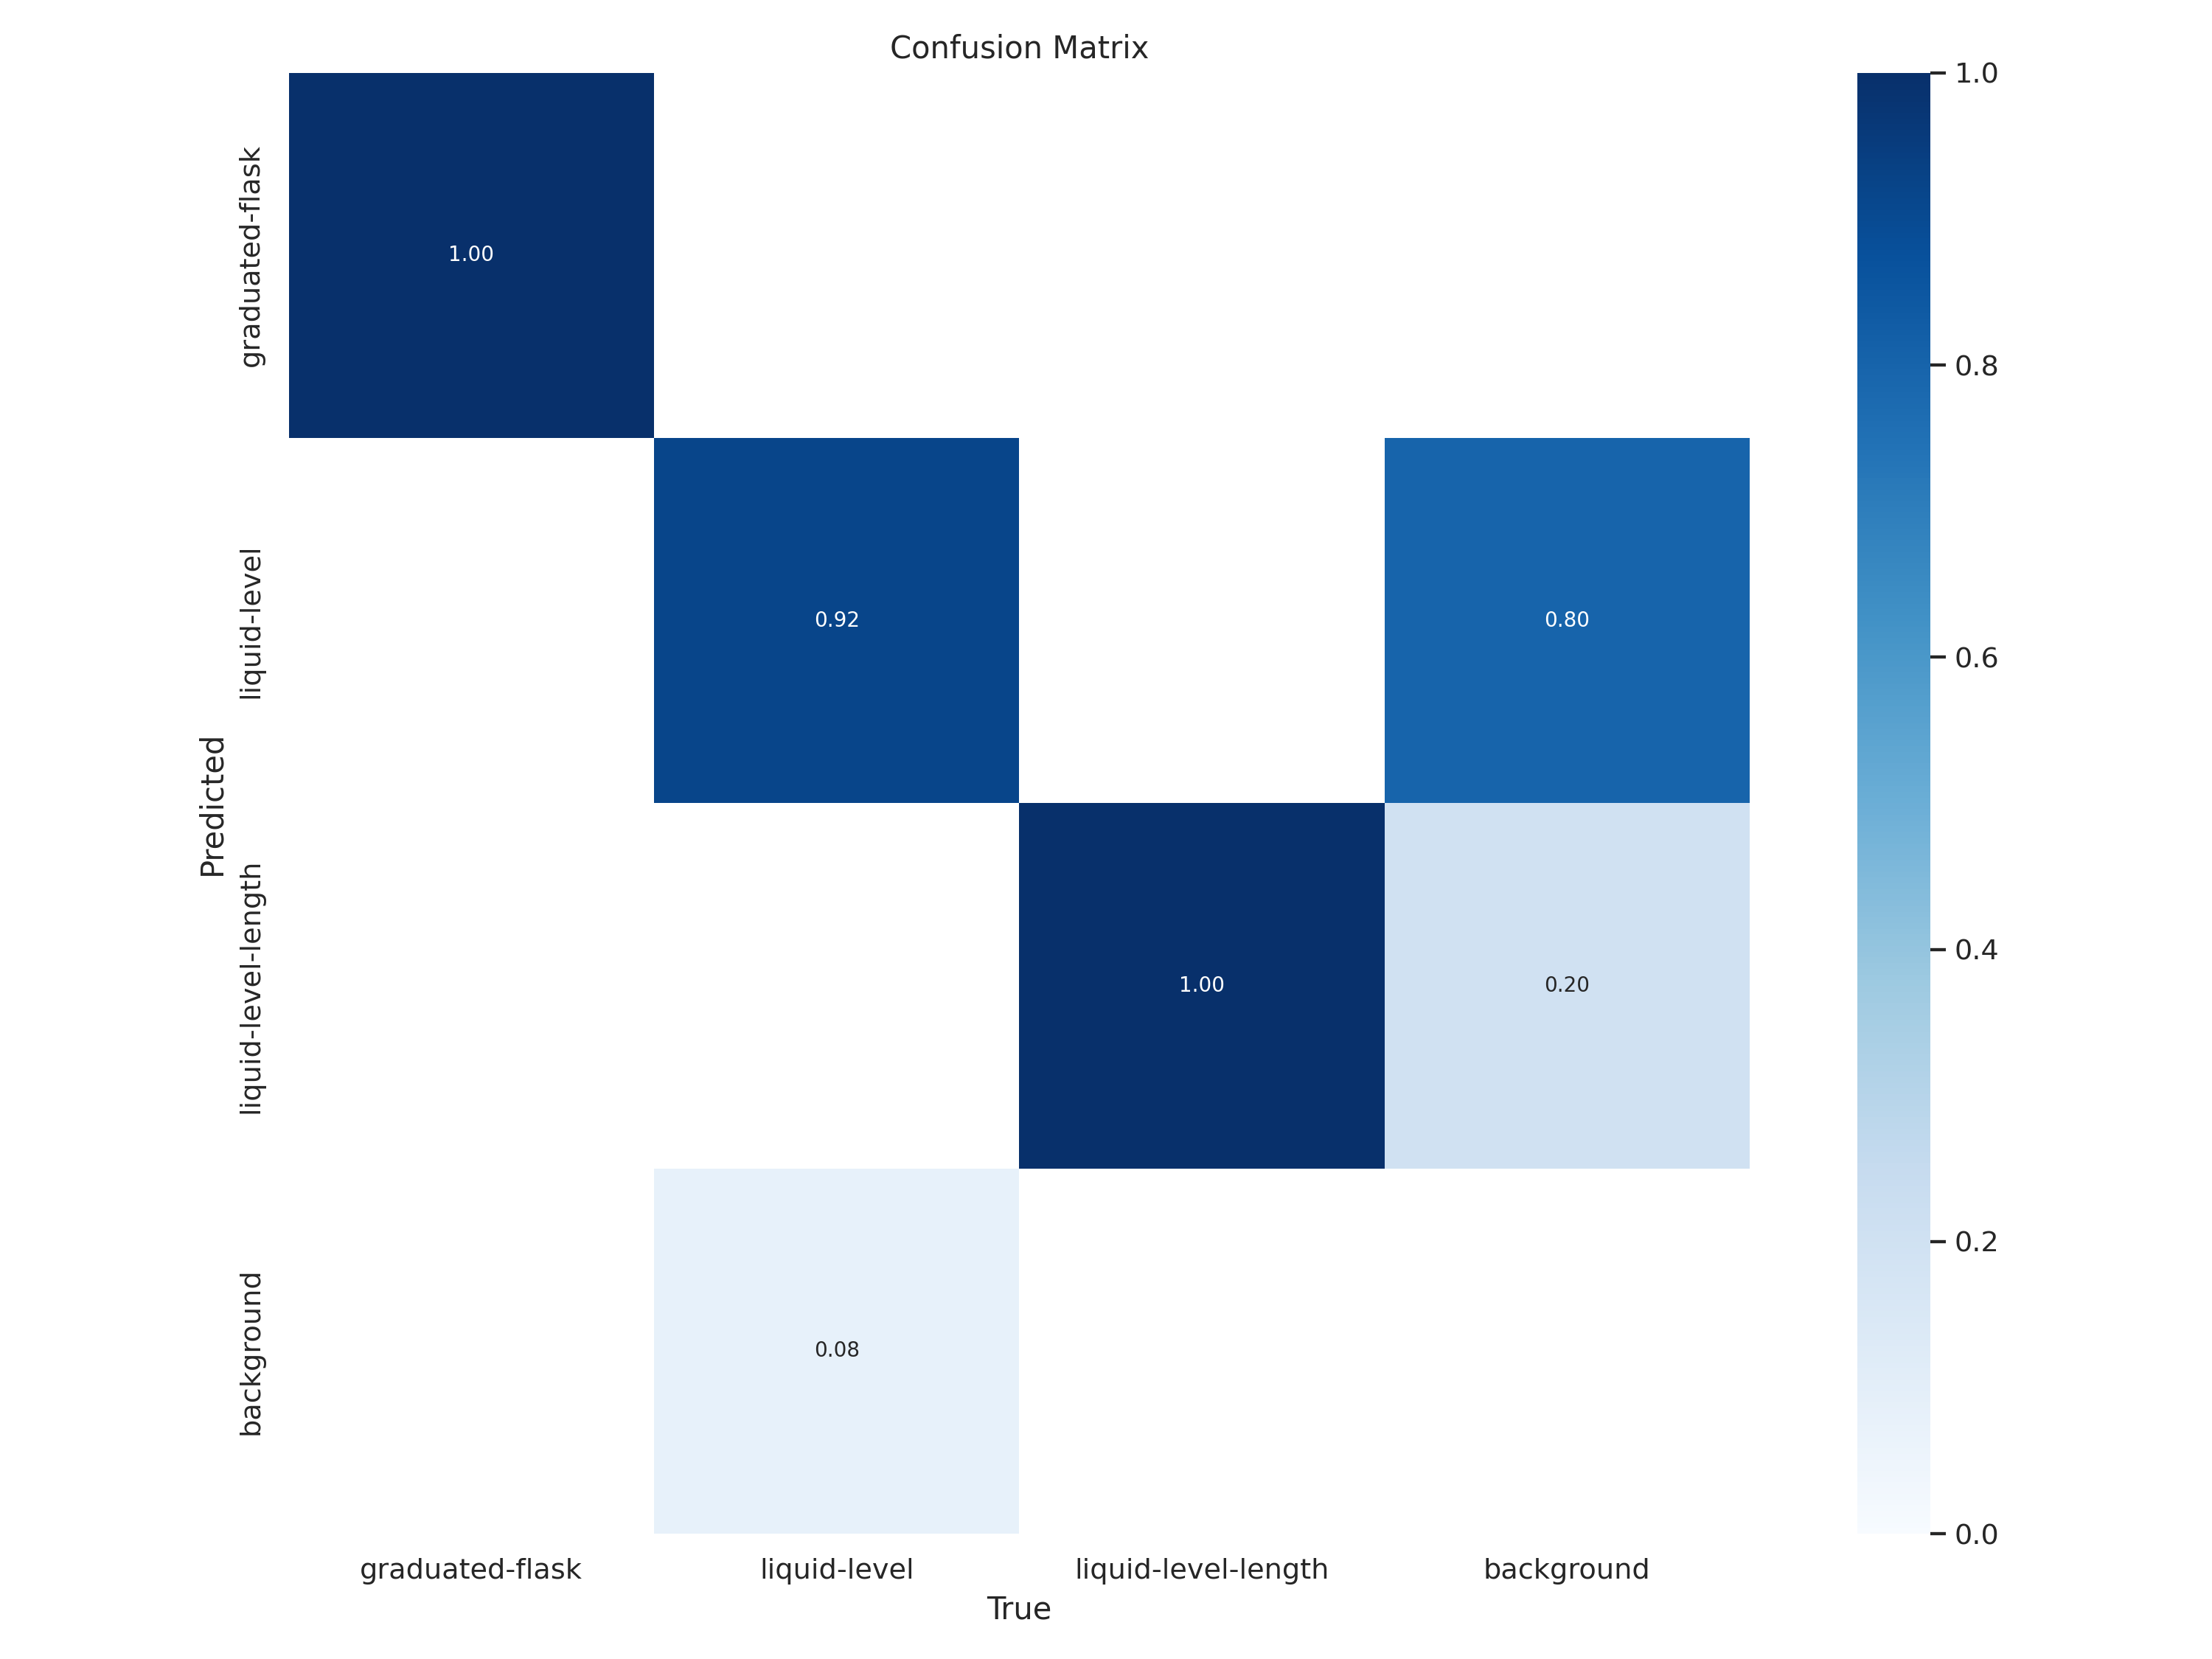

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train3/confusion_matrix.png', width=600)

/content


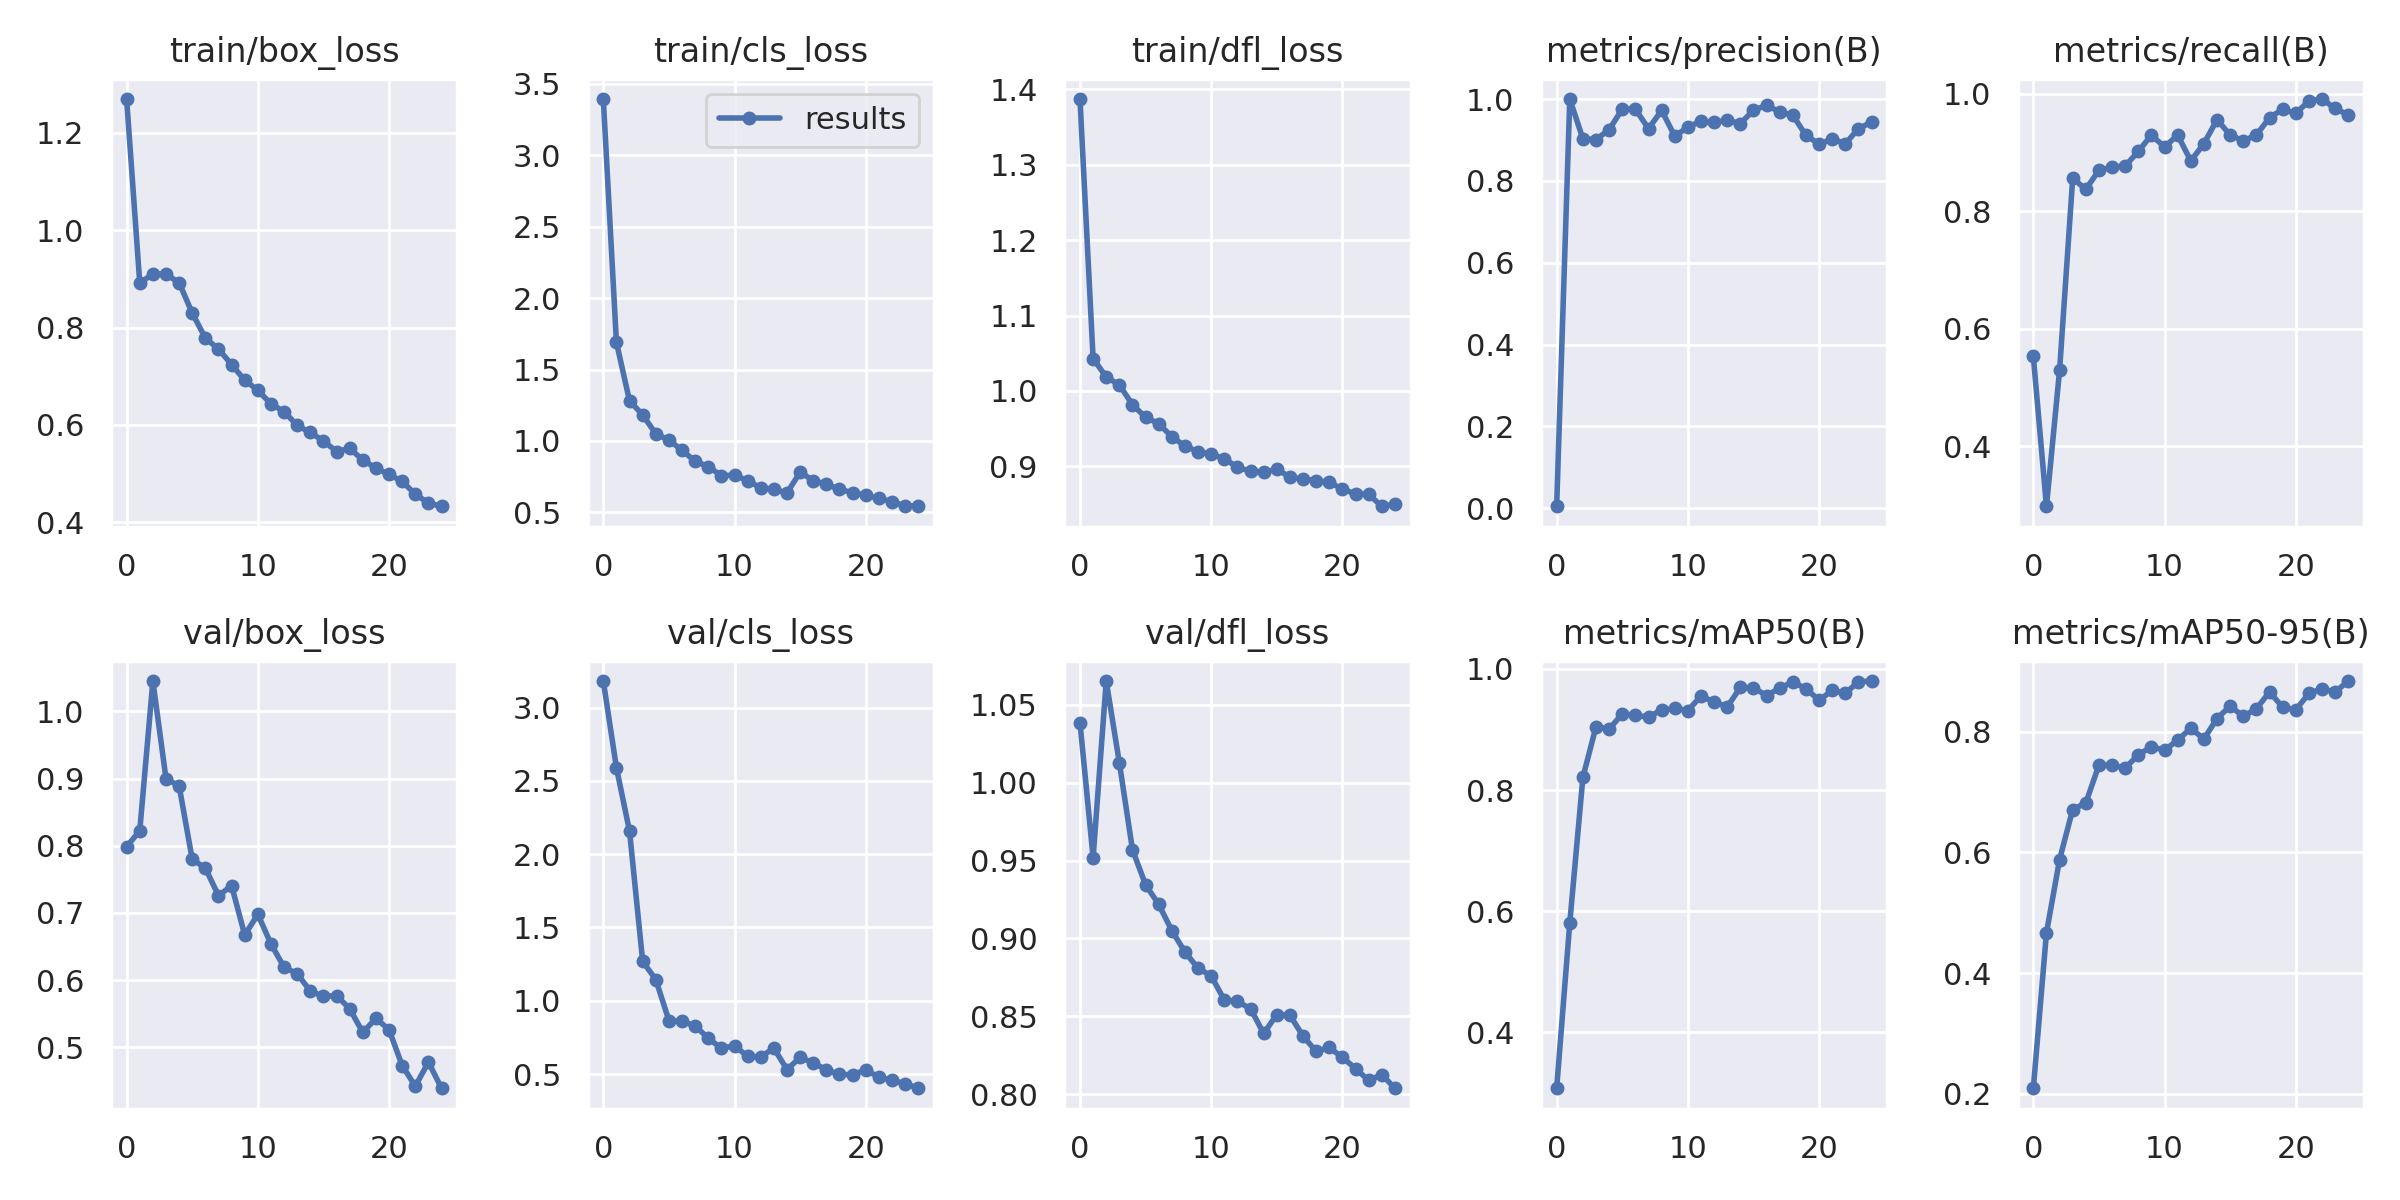

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train3/results.png', width=600)

/content


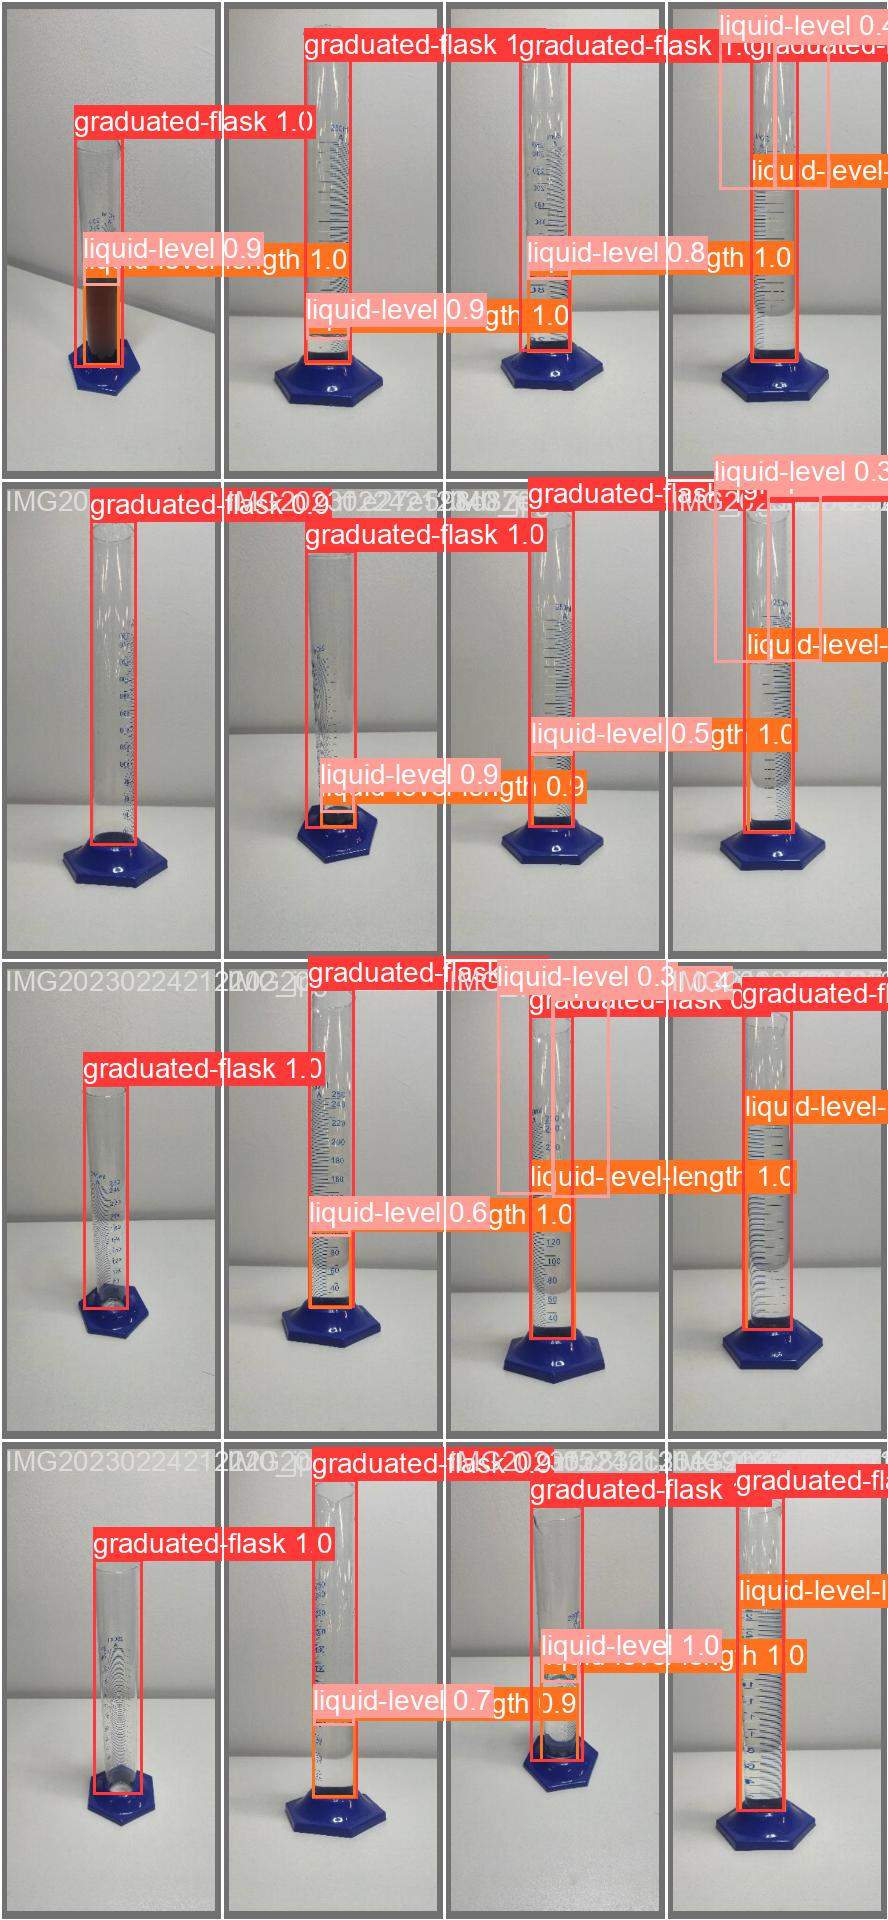

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train3/val_batch0_pred.jpg', width=600)

### Evaluation

In [ ]:
%cd {HOME}

!yolo task=segment mode=val model={HOME}/runs/detect/train3/weights/best.pt data={dataset.location}/data.yaml

/content
2023-05-03 21:15:12.506040: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-03 21:15:13.594455: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3006233 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /content/datasets/Graduated-Flask-segmentation-2/valid/labels.cache... 42 images, 0 backgrounds, 0 corrupt: 100% 42/42 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 3/3 [00:02<00:00,  1.23it/s]
                   all         42        118      0.944      0.964       0.98      0.891
       graduated-flask    

### Inference

In [ ]:
%cd {HOME}
!yolo task=segment mode=predict model={HOME}/runs/detect/train3/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
2023-05-03 21:15:53.611933: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-03 21:15:55.055381: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3006233 parameters, 0 gradients, 8.1 GFLOPs
image 1/23 /content/datasets/Graduated-Flask-segmentation-2/test/images/IMG20230224205804_jpg.rf.8ea432548e90cc4b2dac8bdcc0d8487e.jpg: 800x384 1 graduated-flask, 1 liquid-level, 1 liquid-level-length, 48.3ms
image 2/23 /content/datasets/Graduated-Flask-segmentation-2/test/images/IMG20230224205928_jpg.rf.47b8151f6790b8e6bc8f08069c30a20d.jpg: 800x384 1 graduated-flask, 1 liquid-level, 1 l

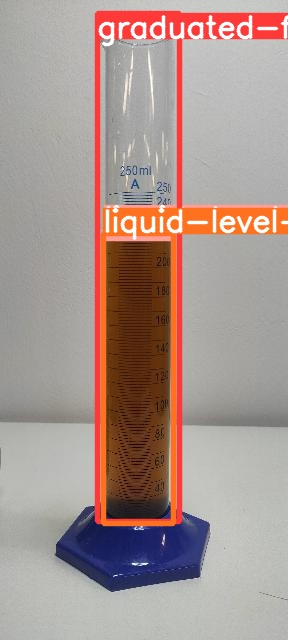

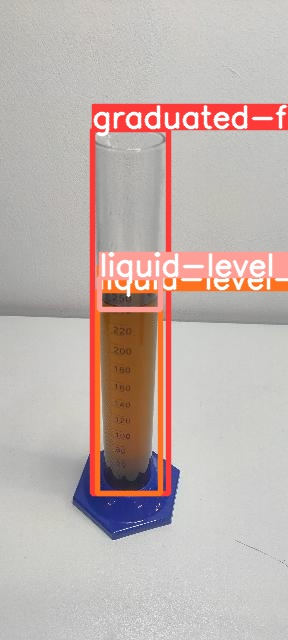

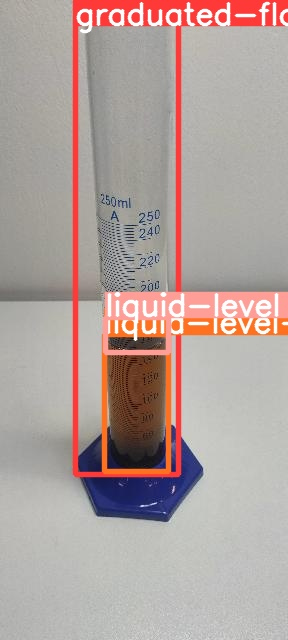

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/segment/predict/*.jpg')[:3]:
      display(Image(filename=image_path, height=600))
      print("\n")